In [39]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [40]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [41]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
#EPHOCS = 40

In [42]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "plantvillage dataset",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
    
)

Found 747 files belonging to 20 classes.


In [43]:
class_names = dataset.class_names
class_names

['Apple___Black_rot',
 'Apple___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___healthy']

In [44]:
len(dataset)

24

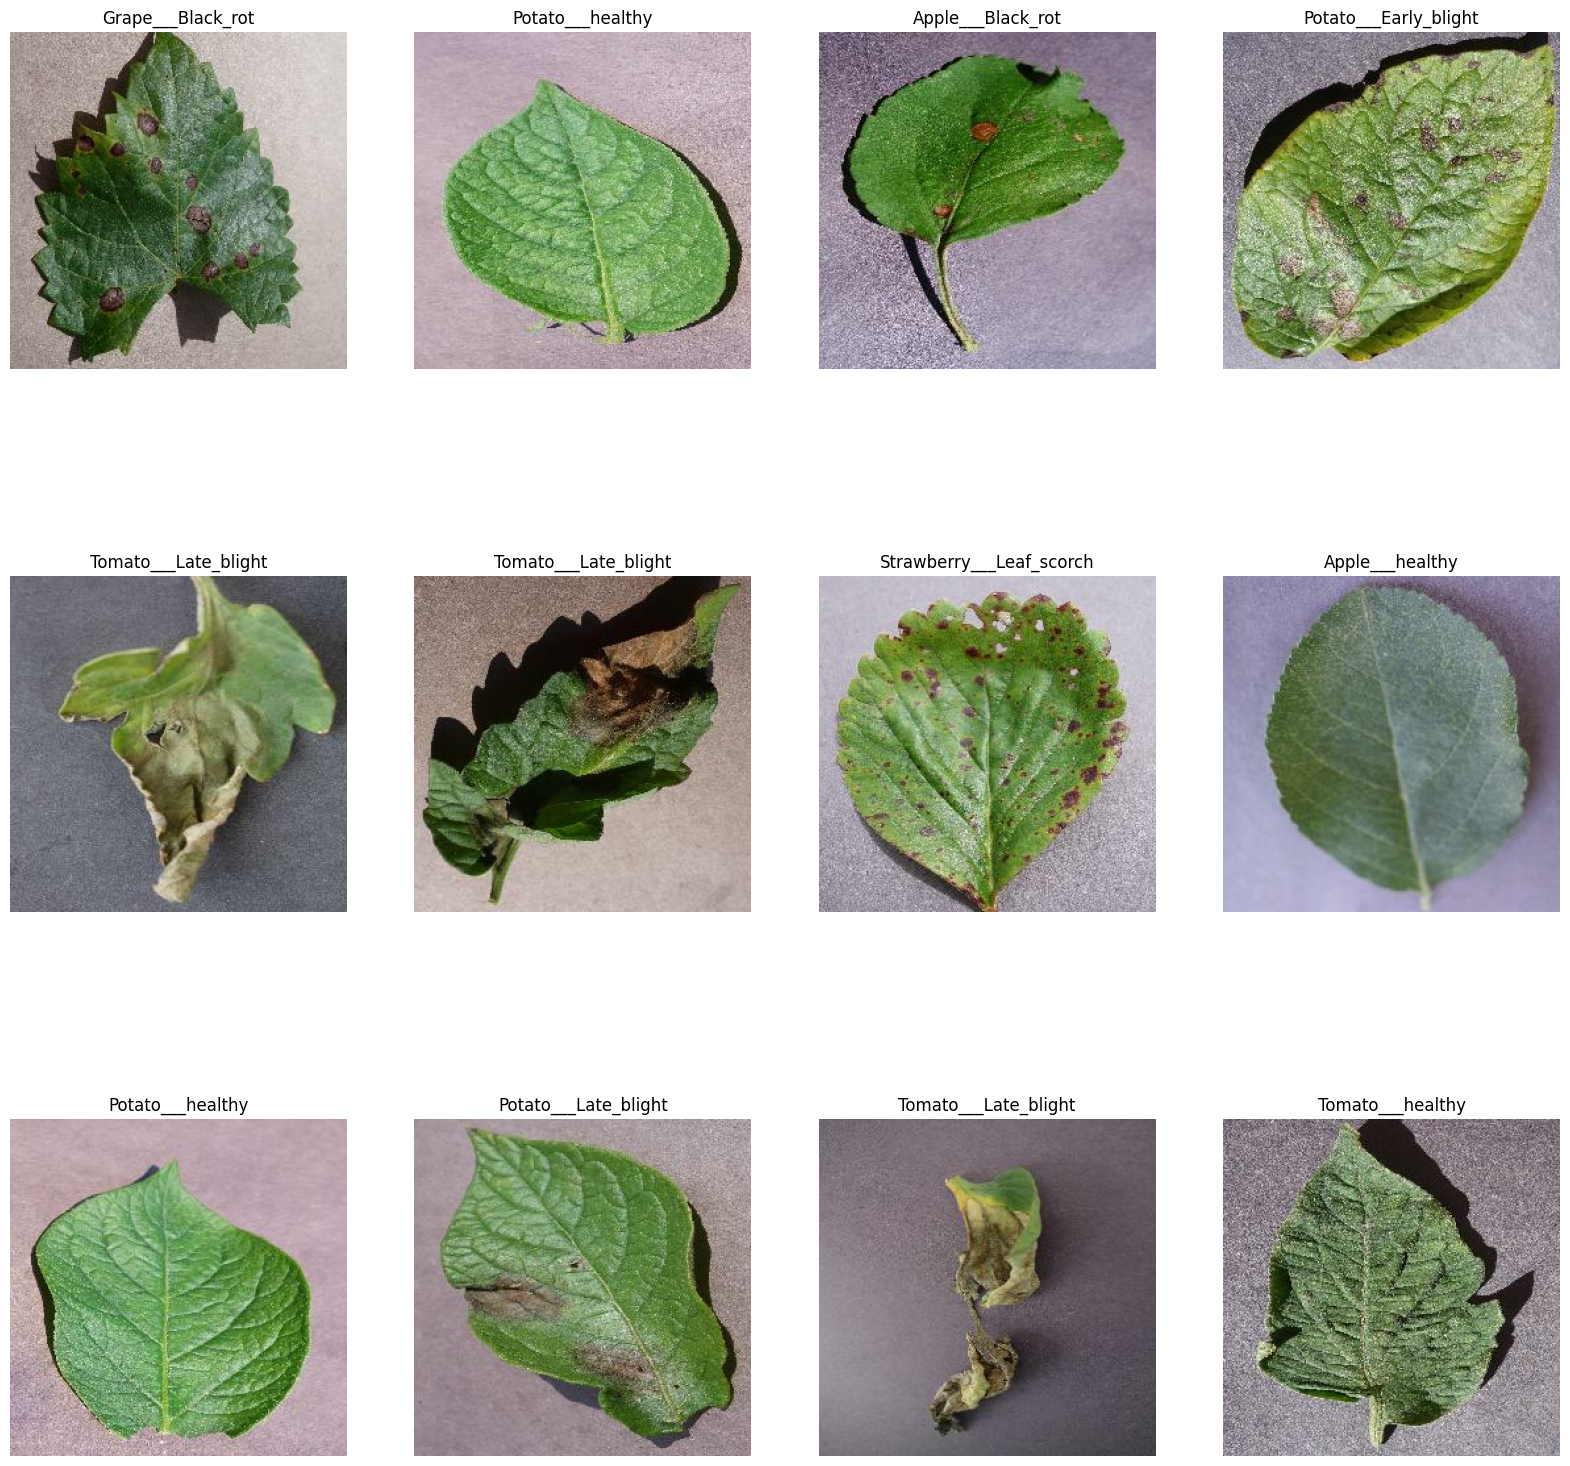

In [45]:
plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [46]:
def dataset_partitions(dataset, train_split=0.8, val_split= 0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    dataset_size = len(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)
    train_size  = int(train_split*dataset_size)
    val_size = int(val_split*dataset_size)
    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds


     

In [47]:
train_ds, val_ds, test_ds = dataset_partitions(dataset)

In [48]:
len(train_ds)

19

In [49]:
len(val_ds)

2

In [50]:
len(test_ds)

3

In [51]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [52]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [53]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [54]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
no_classes = 20
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(no_classes, activation='softmax'),
])       
                  
model.build(input_shape=input_shape)

In [55]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_7 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [56]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [57]:
history = model.fit(
    train_ds,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
19/19 [==============================] - 66s 3s/step - loss: 2.9897 - accuracy: 0.0789 - val_loss: 2.8619 - val_accuracy: 0.1395
Epoch 2/50
19/19 [==============================] - 62s 3s/step - loss: 2.9693 - accuracy: 0.0806 - val_loss: 2.7731 - val_accuracy: 0.1395
Epoch 3/50
19/19 [==============================] - 68s 4s/step - loss: 2.9432 - accuracy: 0.0872 - val_loss: 2.6942 - val_accuracy: 0.1628
Epoch 4/50
19/19 [==============================] - 60s 3s/step - loss: 2.9078 - accuracy: 0.0905 - val_loss: 2.6537 - val_accuracy: 0.1860
Epoch 5/50
19/19 [==============================] - 62s 3s/step - loss: 2.8580 - accuracy: 0.1036 - val_loss: 2.6616 - val_accuracy: 0.1395
Epoch 6/50
19/19 [==============================] - 61s 3s/step - loss: 2.7392 - accuracy: 0.1250 - val_loss: 2.4262 - val_accuracy: 0.3023
Epoch 7/50
19/19 [==============================] - 62s 3s/step - loss: 2.6350 - accuracy: 0.1464 - val_loss: 2.3354 - val_accuracy: 0.2558
Epoch 8/50
19/19 [==

In [58]:
scores= model.evaluate(test_ds)

3/3 [==============================] - 4s 1s/step - loss: 0.5353 - accuracy: 0.8646


In [59]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 19}

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

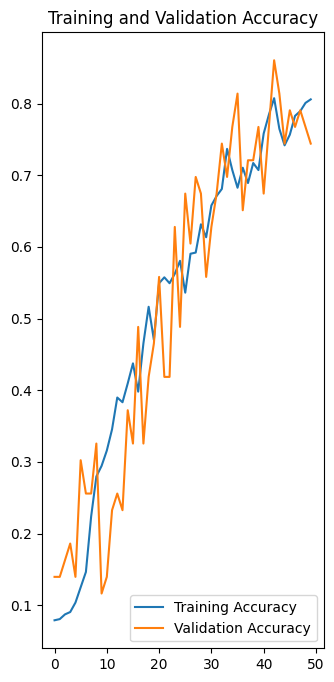

In [61]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image
Label:  Cherry_(including_sour)___Powdery_mildew
1/1 [==============================] - 2s 2s/step
Predicted Label:  Cherry_(including_sour)___Powdery_mildew


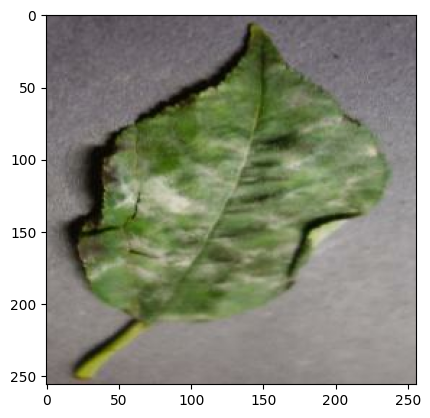

In [62]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print('first image')
    plt.imshow(first_image)
    print('Label: ', class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print('Predicted Label: ',class_names[np.argmax(batch_prediction[0])])

In [63]:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class   = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence


In [64]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
